<a href="https://colab.research.google.com/github/oscarvel821/cs482-assignments/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install kaggle
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"oscarvelazquez","key":"ee492db3fee2a32067da5a39e71f3718"}'}

In [ ]:
#create kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to kaggle folder
! cp kaggle.json ~/.kaggle

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d new-york-city/nyc-east-river-bicycle-crossings

  0% 0.00/1.78k [00:00<?, ?B/s]
100% 1.78k/1.78k [00:00<00:00, 1.62MB/s]


In [ ]:
! unzip nyc-east-river-bicycle-crossings.zip

Archive:  nyc-east-river-bicycle-crossings.zip
  inflating: nyc-east-river-bicycle-counts.csv  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.special as sc
import numpy as np

#Maximum Likelihood I
The obvious choice in distributions is the Poisson distribution which depends only on one parameter, λ, which is the average number of occurrences per interval. We want to estimate this parameter using Maximum Likelihood Estimation.

Implement a Gradient Descent algorithm from scratch that will estimate the Poisson distribution according to the Maximum Likelihood criterion. Plot the estimated mean vs iterations to showcase convergence towards the true mean.



In [ ]:
df = pd.read_csv("/content/nyc-east-river-bicycle-counts.csv")

df

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471
...,...,...,...,...,...,...,...,...,...,...,...
205,205,2016-04-26 00:00:00,2016-04-26 00:00:00,60.1,46.9,0.24,1997.0,3520,4559.0,2929.0,13005
206,206,2016-04-27 00:00:00,2016-04-27 00:00:00,62.1,46.9,0,3343.0,5606,6577.0,4388.0,19914
207,207,2016-04-28 00:00:00,2016-04-28 00:00:00,57.9,48.0,0,2486.0,4152,5336.0,3657.0,15631
208,208,2016-04-29 00:00:00,2016-04-29 00:00:00,57.0,46.9,0.05,2375.0,4178,5053.0,3348.0,14954


In this part we only have to consider count of bikes, here I will focus on each bridge and the total

In [ ]:
df[['Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge', 'Total']]

,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,1704.0,3126,4115.0,2552.0,11497
1,827.0,1646,2565.0,1884.0,6922
2,526.0,1232,1695.0,1306.0,4759
3,521.0,1067,1440.0,1307.0,4335
4,1416.0,2617,3081.0,2357.0,9471
...,...,...,...,...,...
205,1997.0,3520,4559.0,2929.0,13005
206,3343.0,5606,6577.0,4388.0,19914
207,2486.0,4152,5336.0,3657.0,15631
208,2375.0,4178,5053.0,3348.0,14954


It is obvious that the choice in distributions is the Poisson distribution which depends only on one parameter, λ. We can then use the log likelihood:

\begin{align}
      L(λ | X) = -nλ - \sum_{i = 1}^{n} ln(X_i!) + ln(λ)\sum_{i = 1}^{n}X_i
\end{align}

Since maximizing the positive is the same as minimizing the negative, we can just use the negative log likelihood:

\begin{align}
      L(λ | X) = nλ + \sum_{i = 1}^{n} ln(X_i!) - ln(λ)\sum_{i = 1}^{n}X_i
\end{align}

Because it hard to compute the factorial of large numbers, I will use a built gamma function for compute the factorial

In [ ]:
def neg_log_likeihood(lamb, y):
  return len(y) * lamb + np.sum(sc.gammaln(y + 1)) - np.log(lamb) * np.sum(y)

The gradient of the negative log likelihood:

\begin{align}
      \frac{\partial}{\partial λ} = n - \frac{1}{λ}\sum_{i = 1}^{n} X_i
\end{align}

In [ ]:
def gradient(lamb, data):
  return len(data) - np.sum(data) / lamb

In [ ]:
def gradient_descent(start, gradient, learning_rate, n_iterations, data):
  steps = [neg_log_likeihood(start, data)]
  x = start

  for _ in range(n_iterations):
    diff = learning_rate * gradient(x, data)

    x = x - diff

    steps.append(neg_log_likeihood(x, data))

  return steps, x

In [ ]:
n_iterations = 500

history1, optimal_lamb1 = gradient_descent(200, gradient, 0.1, n_iterations, df['Brooklyn Bridge'])
history2, optimal_lamb2 = gradient_descent(200, gradient, 0.1, n_iterations, df['Manhattan Bridge'])
history3, optimal_lamb3 = gradient_descent(200, gradient, 0.1, n_iterations, df['Williamsburg Bridge'])
history4, optimal_lamb4 = gradient_descent(200, gradient, 0.1, n_iterations, df['Queensboro Bridge'])
history5, optimal_lamb5 = gradient_descent(200, gradient, 0.1, n_iterations, df['Total'])

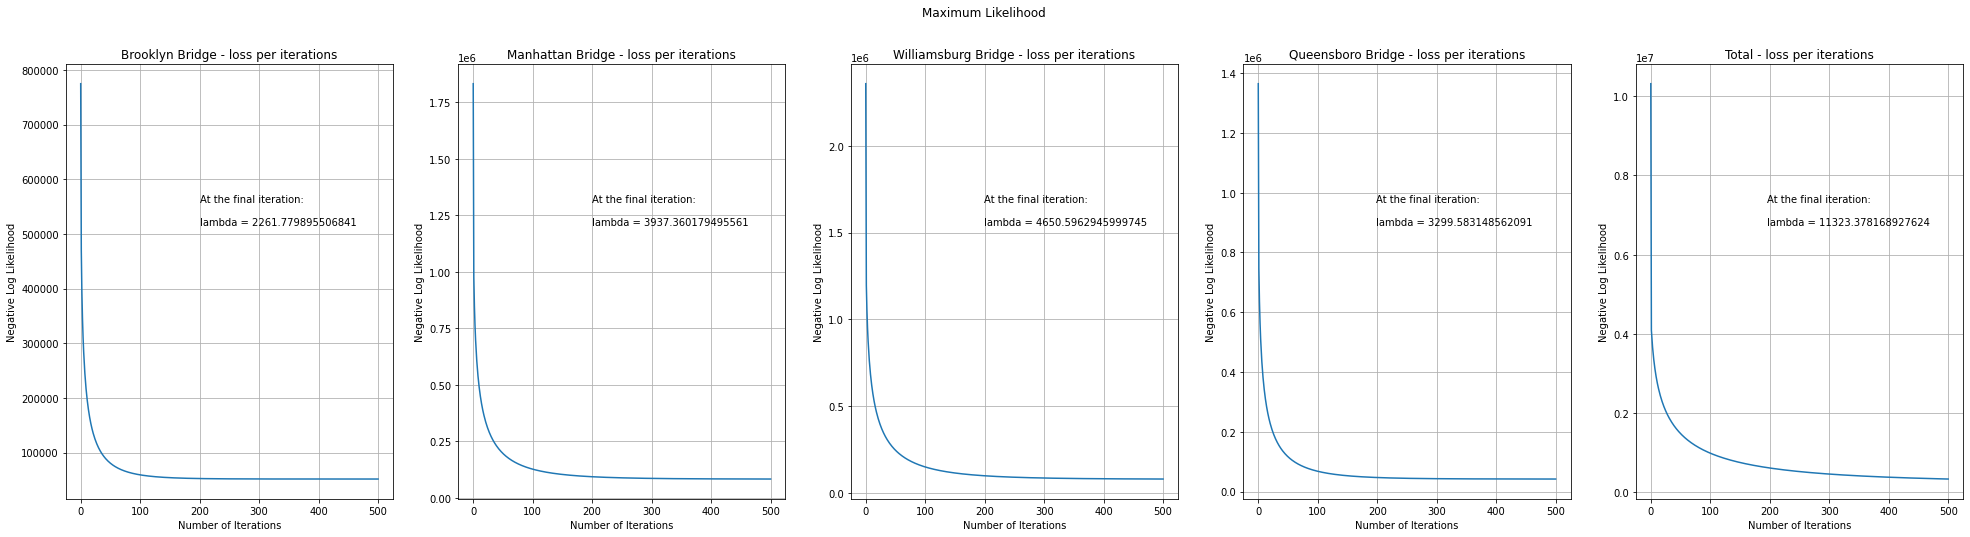

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(34,8))
fig.suptitle('Maximum Likelihood')
axs[0].plot(range(n_iterations + 1), history1)
axs[0].grid()
axs[0].set_title('Brooklyn Bridge - loss per iterations')
plt.figtext(x=.18, y=.6, s="At the final iteration:\n\nlambda = {}".format(optimal_lamb1))
axs[1].plot(range(n_iterations + 1), history2)
axs[1].grid()
axs[1].set_title('Manhattan Bridge - loss per iterations')
plt.figtext(x=.34, y=.6, s="At the final iteration:\n\nlambda = {}".format(optimal_lamb2))
axs[2].plot(range(n_iterations + 1), history3)
axs[2].grid()
axs[2].set_title('Williamsburg Bridge - loss per iterations')
plt.figtext(x=.50, y=.6, s="At the final iteration:\n\nlambda = {}".format(optimal_lamb3))
axs[3].plot(range(n_iterations + 1), history4)
axs[3].grid()
axs[3].set_title('Queensboro Bridge - loss per iterations')
plt.figtext(x=.66, y=.6, s="At the final iteration:\n\nlambda = {}".format(optimal_lamb4))
axs[4].plot(range(n_iterations + 1), history5)
axs[4].grid()
axs[4].set_title('Total - loss per iterations')
plt.figtext(x=.82, y=.6, s="At the final iteration:\n\nlambda = {}".format(optimal_lamb5))

for ax in axs.flat:
    ax.set(xlabel='Number of Iterations', ylabel='Negative Log Likelihood')

## Maximum Likelihood II
A colleague of yours suggest that the parameter 
 must be itself dependent on the weather and other factors since people bike when its not raining. Assume that you model 
 as
 
\begin{align}
      λ_i = exp(w^T x_i)
\end{align}

where $x_i$ is one of the example features and $w$ is a set of parameters.

Train the model with SGD with this assumption and compare the MSE of the predictions with the Maximum Likelihood I approach.

For this part, we are going to say the λ dependents on the weather which in our case with be the Precipitation column in our data. Before we do any calculation we have to clean up our data, because we might have come missing values.

In [ ]:
#from kaggle 
def print_bad_values(df):
    print(df[df.Precipitation.map(lambda x : x.replace('.', '', 1).isdigit() == False)].Precipitation)
    
print_bad_values(df)

3      0.47 (S)
21            T
33     0.47 (S)
51            T
63     0.47 (S)
81            T
93     0.47 (S)
111           T
123    0.47 (S)
141           T
153    0.47 (S)
171           T
183    0.47 (S)
201           T
Name: Precipitation, dtype: object


In [ ]:
df.Precipitation = df.Precipitation.map(lambda x : '0.0' if x == 'T' else x)
df.Precipitation = df.Precipitation.map(lambda x : x.split()[0] if 'S' in x  else x)
print_bad_values(df)

Series([], Name: Precipitation, dtype: object)


In [ ]:
df.Precipitation = df.Precipitation.map(lambda x : float(x))
print('min {}, max {}'.format(df.Precipitation.min(), df.Precipitation.max()))

min 0.0, max 0.47


In [ ]:
average = df['Precipitation'].mean()
print(average)

0.05233333333333333


There is two ways to fill in missing values, one way is to fill them in with all zeros, the other way is to fill them in with the average of all values. For this problem I did the later.

In [ ]:
df.Precipitation = df.Precipitation.map(lambda x : average if x == 0.0 else x)

In [ ]:
X = df['Precipitation']
colors = ['#fcb103', '#C12B2B', '#305FE2', '#20DF3A', '#C620DF']
names = ['Brooklyn Bridge', 'Manhattan Bridge', 'Williamsburg Bridge', 'Queensboro Bridge', 'Total']
ys = [df['Brooklyn Bridge'], df['Manhattan Bridge'], df['Williamsburg Bridge'], df['Queensboro Bridge'], df['Total']]
# y1 = df['Brooklyn Bridge']
# y2 = df['Manhattan Bridge']
# y3 = df['Williamsburg Bridge']
# y4 = df['Queensboro Bridge']
# y5 = df['Total']

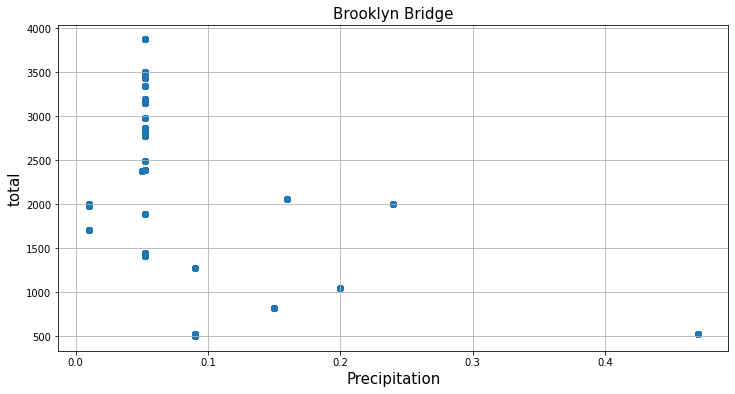

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title(f"{names[0]}", fontsize='15')
plt.xlabel('Precipitation', fontsize='15')
plt.ylabel('total', fontsize='15')
ax.scatter(X, ys[0])
ax.grid()
plt.show()

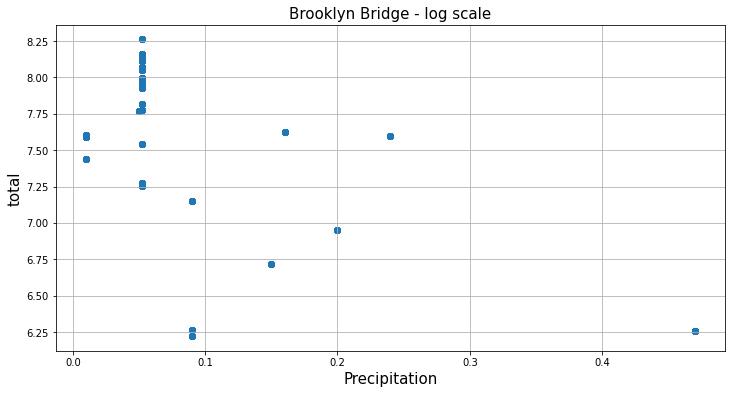

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

plt.title(f"{names[0]} - log scale", fontsize='15')
plt.xlabel('Precipitation', fontsize='15')
plt.ylabel('total', fontsize='15')
ax.scatter(X, np.log(ys[0]))
ax.grid()
plt.show()

In [ ]:
X = X.to_numpy()

for i in range(5):
  ys[i] = np.log(ys[i])

In [ ]:
X_b = X.reshape(210, 1)

Ok now that we are done cleaning up the data, we can move on to the poisson regression. We know that our $ŷ = X^T w + b$ so then our loss function will be

\begin{align}
      Loss = \frac{1}{M} \sum_{i = 1}^{n} log(ŷ_i) y_i - ŷ_i
\end{align}

But just like in part 1, maximizing the positive is the same as minimizing the negative, so

\begin{align}
      Loss = \frac{1}{M} \sum_{i = 1}^{n} ŷ - log(ŷ_i) y_i
\end{align}

In [ ]:
def loss(x, y, w, b):
  y_hat = np.exp(x @ w + b)
  error = (y_hat - np.log(y_hat) * y).mean()
  return error

Since we have two parameters that we want to optimize (w and b), then we need to find the gradient for both

\begin{align}
      \frac{\partial Loss}{\partial w} = \frac{1}{M} \sum_{i = 1}^{n} x_i(ŷ_i - y_i)
\end{align}

\begin{align}
      \frac{\partial Loss}{\partial b} = \frac{1}{M} \sum_{i = 1}^{n}(ŷ_i - y_i)
\end{align}

In [ ]:
def grad(x, y, w, b):
  M, n = x.shape
  y_hat = np.exp(x @ w + b)
  dw = (x.T @ (y_hat - y)) / M
  db = (y_hat - y).mean()
  return dw, db
  
def gradient_descent(x, y, w_0, b_0, alpha, num_iter):
  w, b = w_0.copy(), b_0
  hist = np.zeros(num_iter)
  M, n = x.shape

  for iter in range(num_iter):
    dw, db = grad(x, y, w, b)
    w -= alpha * dw 
    b -= alpha * db
    hist[iter] = loss(x, y, w, b)

  return w, b, hist

<ipython-input-135-dc3398b27889>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs[i].plot(hist, 'b', color=colors[i])


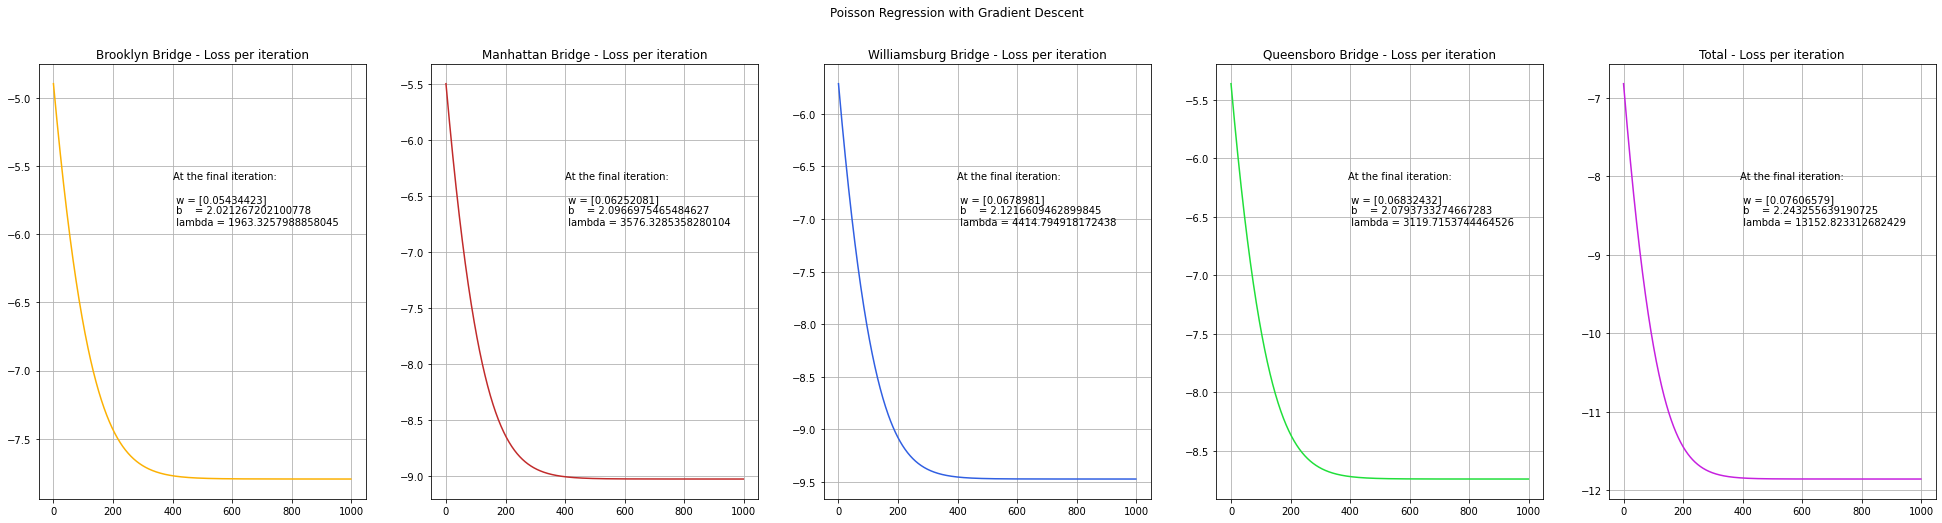

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(34,8))
fig.suptitle('Poisson Regression with Gradient Descent')
pos = .18

for i in range(5):
  wi, bi, hist = gradient_descent(X_b, ys[i], w, b, eta, 1000)

  axs[i].plot(hist, 'b', color=colors[i])
  axs[i].set_title(f'{names[i]} - Loss per iteration')
  axs[i].grid()
  plt.figtext(x=pos, y=.6, s="At the final iteration:\n\n w = {}\n b    = {}\n lambda = {}".format(wi, bi, np.exp(np.exp(X_b @ wi + bi).mean())))
  pos += .16
plt.show()

Now lets use stochastic gradient descent to see if the results change. Since we dont know what w and b are we'll set it to 0 and 1.

In [ ]:
w = np.array([0.0])
b = 1.0

In [ ]:
eta = 0.001
epochs = 15
t0, t1 = 5, 20 #hyperparameters

In [ ]:
def learning_rate(t):
  return t0 / (t + t1)

In [ ]:
def stoc_gradient_descent(x, y, w_0, b_0, epochs, eta):
  w, b = w_0.copy(), b_0
  hist = []
  m, n = x.shape

  for epoch in range(epochs):
    for i in range(m):
      rand_idx = np.random.randint(m)
      xi = x[rand_idx:rand_idx + 1]
      yi = y[rand_idx: rand_idx + 1]

      y_hat = np.exp(xi @ w + b)
      dw = (xi.T @ (y_hat - yi)) 
      db = (y_hat - yi).mean()
      

      eta = learning_rate(epoch*m + i)
      w = w - eta * dw
      b = b - eta * db

      hist.append(loss(x, y, w, b))
  return w, b, hist

<ipython-input-140-68fe60630189>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  axs[i].plot(hist, 'b', color=colors[i])


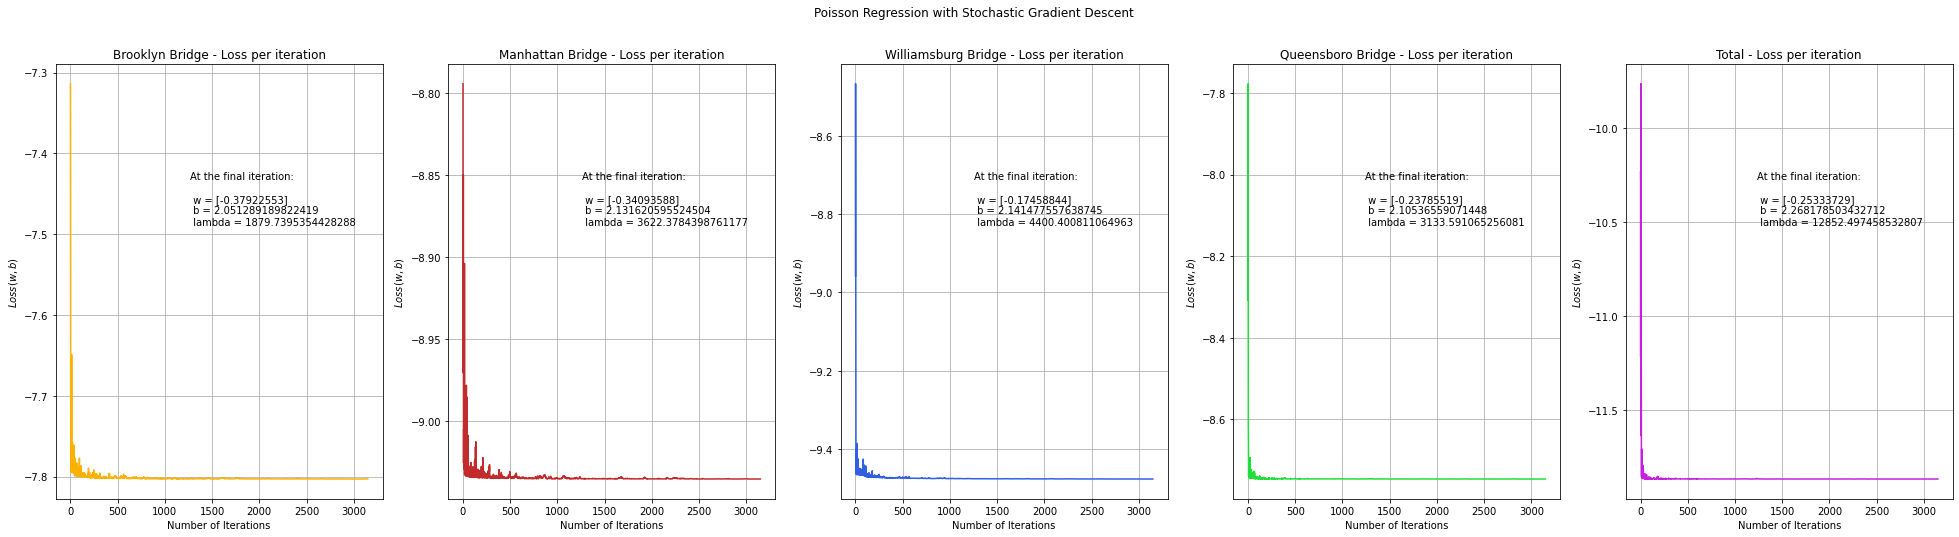

In [ ]:
fig, axs = plt.subplots(1, 5, figsize=(34,8))
fig.suptitle('Poisson Regression with Stochastic Gradient Descent')
pos = .18

for i in range(5):
  wi, bi, hist = stoc_gradient_descent(X_b, ys[i], w, b, epochs, eta)

  axs[i].plot(hist, 'b', color=colors[i])
  axs[i].set_title(f'{names[i]} - Loss per iteration')
  axs[i].grid()
  plt.figtext(x=pos, y=.6, s="At the final iteration:\n\n w = {}\n b = {}\n lambda = {}".format(wi, bi, np.exp(np.exp(X_b @ wi + bi).mean())))
  pos += .16

for ax in axs.flat:
    ax.set(xlabel='Number of Iterations', ylabel=r'$Loss(w, b)$')
plt.show()

As we can see from the graphs above, there was more noise while trying to converge to true mean. Compare to part 1, the results are a bit similar but we could've maybe got better results if we included more features like "high temp" or "low temp", overall there is potential to improve the results.